<a href="https://colab.research.google.com/github/Hannibal730/DL-ComputerVision/blob/main/03_%EC%88%98%EB%8B%AC%EC%82%AC%EC%A7%84%EC%9C%BC%EB%A1%9C_opencv%EC%9D%98_filter%2C_Affine%EB%B3%80%ED%99%98_%EC%97%B0%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# url으로부터 이미지를 가져와서 주소 설정하기. 앞으로 이 주소를 계속 활용함

In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# URL로부터 이미지 파일 저장
# https://ifh.cc/ 사이트에서 이미지를 링크화 가능하다.

img_url = 'https://ifh.cc/g/R5SgAw.jpg'
filename = 'sudal.jpg'
img_path = keras.utils.get_file(filename, img_url)
#이렇게 3줄을 계속 같이 쓴다. 마치 세트 같은 거야

img_path

73915/73915 [==============================] - 0s 3us/step


'/root/.keras/datasets/sudal.jpg'

#PIL으로 이미지 출력하기

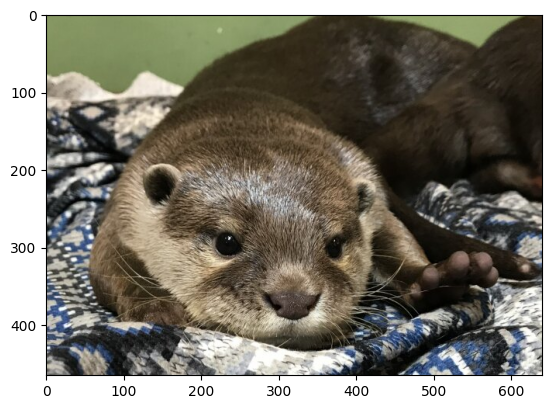

In [ ]:
# Python Image Library
from PIL import Image

img = Image.open(img_path) # use Image.open(image_location)
image = np.array(img.convert('RGB')) # to convert img object to array value use np.array

plt.imshow(image)

In [ ]:
print(image[0][0])   # 1행1열을 의미하는 인덱싱이다. 그냥 해봄

[131 148  96]


#OpenCV로 이미지 출력하기 (OpenCV 자체 단점은 BRG가 기본이라는 점이다.)

[ 96 148 131]
[131 148  96]


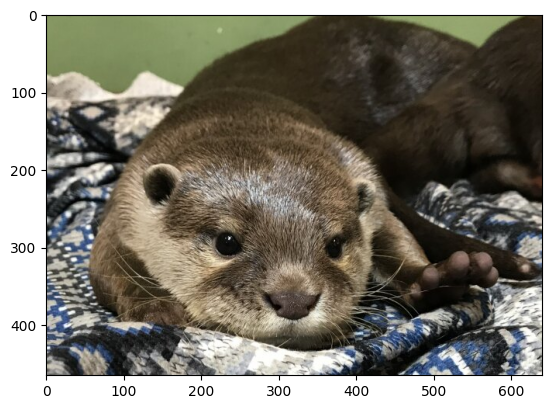

In [ ]:
import cv2

image = cv2.imread(img_path)
print(image[0][0])
#이렇게 하면, cv2가 원래 사용하는 BRG 순서로 값이 나올 것이다.


# convert opencv RGB for opencv. 이렇게 하면 우리가 아는 RBG순서로 값이 나올 것이다.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image[0][0])
plt.imshow(image)

# matplotlib으로 이미지 출력하기

array([131, 148,  96], dtype=uint8)

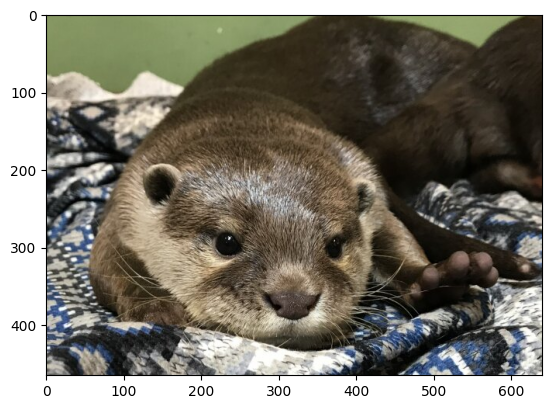

In [ ]:
from matplotlib import image as mp_image
img = mp_image.imread(img_path)
plt.imshow(img)
img[0][0]

#MNIST 데이터

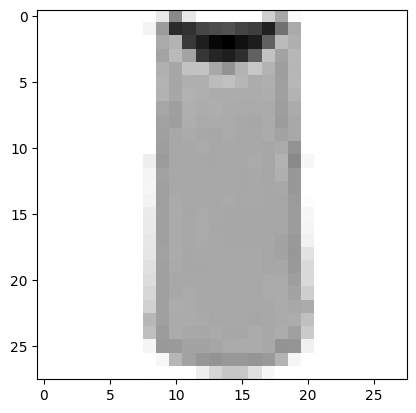

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #가져오고
plt.imshow(train_images[2], cmap=plt.cm.binary) #세번째에 뭐가 있는지도 출력
#plt.imshow(train_images[2], cmap=plt.cm.gray) #cm.gray로 하면 흑백반대

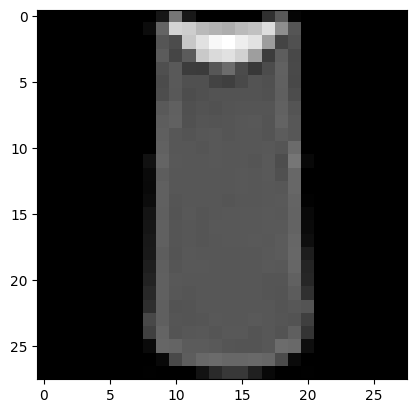

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #가져오고
#plt.imshow(train_images[2], cmap=plt.cm.binary) #세번째에 뭐가 있는지도 출력
plt.imshow(train_images[2], cmap=plt.cm.gray) #cm.gray로 하면 흑백반대

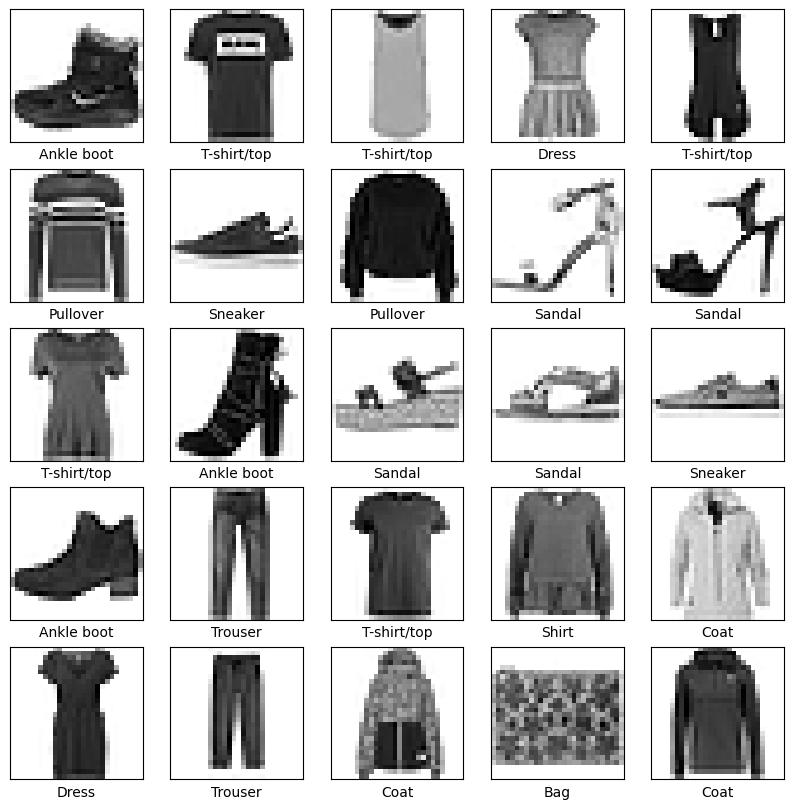

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) #전체 표출 그림 사이즈
for i in range(25):
    plt.subplot(5,5,i+1) # 5x5 격자로 그림 표출
    plt.xticks([]) # x축 눈금을 안 나오게 공백
    plt.yticks([]) # y축 눈금을 안 나오게 공백
    plt.grid(False) #격자를 안 나오게 공백
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 이미지 저장하는 방법

In [ ]:
#위에서 이미지 패스 설정한 것까지 수행 필요.
#이미지 불러오는 방법들 중에서 opencv를 사용. 왜냐면 BRG인 거 말고는 제일 간단.
# 밑에 두 줄은 opencv로 불러오고, RGB로 변환하는 과정.

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# PIL
from PIL import Image
import numpy as np

PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')

# 앞 셀에서 opencv로 불러와서 어레이 상태인 객체를 uint상태로 바꿔주고,
# fromarray함수로 pil형태로 바꾸고, BRG를 RGB로도 바꿔주고.

PIL_image.save('test1.jpg')

# 만약 그냥 PIL_image.save('test.png') 이렇게 하면, 내가 지금 이 주피터노트북 파일을 가동중인 경로에 저장됨 sys.path의 주소말이야

In [ ]:
# opencv는 BGR 형태라야 저장 가능하다.ㅋㅋㅋ
import cv2

# convert opencv RGB for opencv
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#그래서 다시 바꿔줌.

cv2.imwrite('test2.jpg', image2)



True

In [ ]:
# matplotlib
from matplotlib import pyplot as plt
plt.imsave('test3.png', image)

In [ ]:
#저장되었는지 확인하려고 써봄.
#근데 지금 윈도우로 하는데도 잘 되네.
! ls -l test1.jpg

-rw-r--r-- 1 root root 68312 Jun  9 16:18 test1.jpg


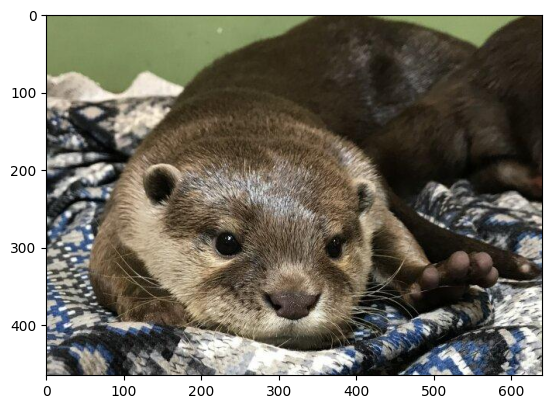

In [ ]:
from matplotlib import image as mp_image
image3 = mp_image.imread('test1.jpg')
plt.imshow(image3)

# 매트릭스 dot product 연습하기

In [ ]:
import numpy as np

w = np.array([ [ 2, 1 ],
               [ 0, 1 ] ])
x = np.array(  [3, 4]  )
y = np.dot(w,x)
print(y)
print(y.shape)
# 이걸 많이 쓰기는 하는데, 여기서 x는 가로가 아니라 사실 세로로 써지는 벡터잖아.
# 그래서 이 점을 살리기 위해서 아래처럼 x의 세로형태를 컬럼벡터로 표현할 수 있다.
# 그러면 y도 세로로 나옴

[10  4]
(2,)


In [ ]:
# 컬럼 벡터 (수식과 같은 모양)
w = np.array([ [ 2, 1 ],
               [ 0, 1 ] ])

x = np.array([ [3],
               [4] ])
y = np.dot(w,x)
print(y)
# 이러면 y가 세로로 나옴

print(y.shape)
# 흠... 근데 x랑 y모두 벡터인데, y가 2행1열이라고 나오네... y는 행렬이 아닌데... 끙;;

[[10]
 [ 4]]
(2, 1)


# 행렬곱 연습

In [ ]:
# (2,2)=(2,2).(2,2)

w = np.array([ [ 2, 1 ],
               [ 0, 1 ] ])

x = np.array([ [ 3, 3 ],
               [ 4, 4 ] ])
y = np.dot(w,x)
print(y.shape)
y

(2, 2)


array([[10, 10],
       [ 4,  4]])

# 트랜스포짓 연습하기

In [ ]:
# transpose (전치 행렬)
x = np.array([ [ 1, 2 ],
               [ 3, 4 ] ])
x2 = x.T
print(x2)



[[1 3]
 [2 4]]


# Affine 변환

[[  1.    0.    0. ]
 [ -0.5   0.8 320. ]]


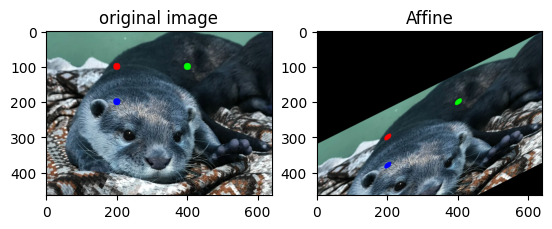

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

img_url = 'https://ifh.cc/g/R5SgAw.jpg'
filename = 'sudal.jpg'
img_path = keras.utils.get_file(filename, img_url)
img = cv2.imread(img_path)


rows, cols, ch = img.shape #로우,컬럼,채널을 이미지로부터 추출한다.

# 점3개를 변화 전과 후로 나누어 지정하고, 변화 전 후 차이로 설정해둔 만큼 실제로 변화시킬 거야.
pts1 = np.float32([[200,100],[400,100],[200,200]]) #변화 전
pts2 = np.float32([[200,300],[400,200],[200,380]]) #변화 후


# 변화 전에 찍은 점, 즉 pts1의 좌표를 원본이미지에 추가하기.
#Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)  #동그라미모양 표시, img에 표시, 표시위치(즉, pts1의 지점들), 10크기, 표시색깔, RGB순서니까 빨간색,-1은 원을 채우라는 의미
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

# Affine 변환 행렬 얻기
M = cv2.getAffineTransform(pts1, pts2)
print(M)


# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('original image')     # 121: 1행2열로 나누고 그중 첫 번째
plt.subplot(122),plt.imshow(dst),plt.title('Affine')  #여기서는 imshow(dst)
plt.show()

In [12]:
# Affine 변환 행렬을 인덱싱하기
# 그냥 행렬 인덱싱 방법으로 봐도 될 듯.

print(M)
A = M[:, :2] # same as a=M[:, 0:2]  # M행렬에서 행은 전부, 열은 0부터1열까지 인덱싱
b = M[:, 2:]
print(A)
print(b)

[[  1.    0.    0. ]
 [ -0.5   0.8 320. ]]
[[ 1.   0. ]
 [-0.5  0.8]]
[[  0.]
 [320.]]


# 2행3열 꼴의 어파인 행렬에서 3열의 의미

In [21]:
# Affine 변환 행렬
#M = np.array([[a, b, tx],
#              [c, d, ty]])

# y=Mx 형태일 때, 우리가 지금까지 연습한 그림데이터, 즉 x벡터는 (A,B,1)형태이다. 평면이니까.
# 근데 2행3열 행렬이니까 리니얼리 디펜던트인 컬럼이 하나 있는 거잖아.
# 그니까 우리가 특정시켜준 컬럼 두 개를 베이시스라고 설정하고, 나머지 하나는 평행이동컬럼 시키자.

#직접 Affine Matrix 설정하기

다음과 같은 회전변환의 Affine matrix를 가정합니다.  

$$
A = \begin{bmatrix}
 \cos {\pi\over6} & -\sin {\pi\over6}\\
 \sin {\pi\over6} & \cos {\pi\over6}
\end{bmatrix},\quad
b = \begin{bmatrix}
 100\\
 -100
\end{bmatrix},\quad
$$

$2\pi$가 $360^{\circ}$ 이므로, ${\pi\over 6}$는 $30^{\circ}$에 해당합니다.


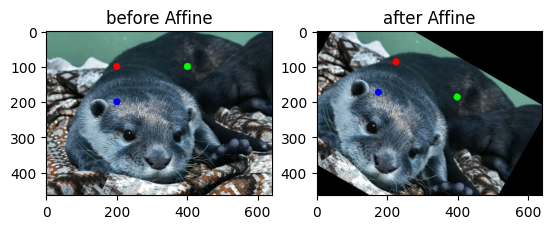

In [26]:
M = np.array([ [np.cos(np.pi/6), -np.sin(np.pi/6), 100],
               [np.sin(np.pi/6),  np.cos(np.pi/6), -100] ])

# Affine 변환
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('before Affine')
plt.subplot(122),plt.imshow(dst),plt.title('after Affine')
plt.show()

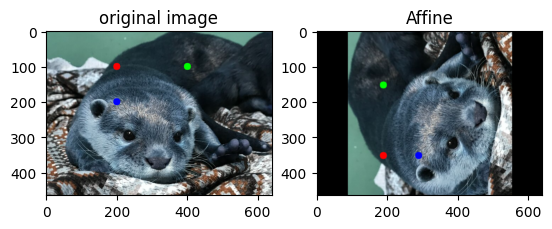

In [28]:
center = (cols/2, rows/2)  #센터는 이미지의 한가운데로 설정
angle = 90  #90도
scale = 1  #스케일은 변환없음
# 회전 변환
M = cv2.getRotationMatrix2D(center, angle, scale)
# Affine 변환하기
dst = cv2.warpAffine(img, M, (cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('original image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

#컨볼루션 필터

In [30]:
x = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]],dtype=float)


kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1],],)

y = cv2.filter2D(x, -1, kernel, borderType=cv2.BORDER_CONSTANT)
# -1은 출력이미지의 뎁스를 입력이미지의 뎁스와 같게 하겠다.
# borderType=cv2.BORDER_CONSTANT 이라고만 하면, 기본값이 0이라서 0으로 패딩된다.
# borderType=cv2.BORDER_CONSTANT, borderValue=255) 이렇게 패딩값을 지정할 수도 있음.

print(y)

[[3. 5. 5. 3. 1.]
 [3. 6. 7. 6. 3.]
 [1. 4. 7. 7. 4.]
 [1. 4. 6. 6. 3.]
 [1. 3. 4. 3. 1.]]


# 박스 블러

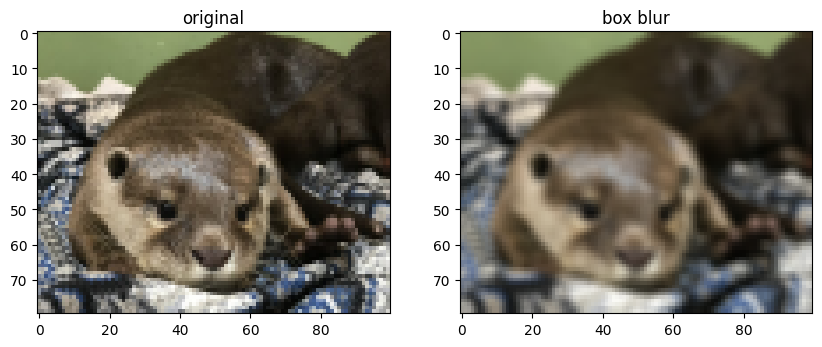

In [37]:
img_url = 'https://ifh.cc/g/R5SgAw.jpg'
filename = 'sudal.jpg'
img_path = keras.utils.get_file(filename, img_url)

src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
#장전 완료.

#사이즈 줄이기. 사이즈가 너무 커지면, 점묘법마냥 블러의 효과가 떨어진다.
image = cv2.resize(src, dsize=(100, 80), interpolation=cv2.INTER_AREA)#마지막에 이건 강의에서 배웠던 보정 알고리즘


box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.
# 원본의 컬러를 유지하려면, 컨볼루젼 썸이 1

dst = cv2.filter2D(image, -1, box_blur)     # -1은 출력이미지의 뎁스를 입력이미지의 뎁스와 똑같게 하겠다는 의미
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('box blur')
plt.show()

# 엣지: 이미지에서 밝기가 급격하게 변화하는 부분으로, 대부분의 경우 물체의 경계를 의미.
#엣지 검출은 이미지에서의 엣지만 보여줌.

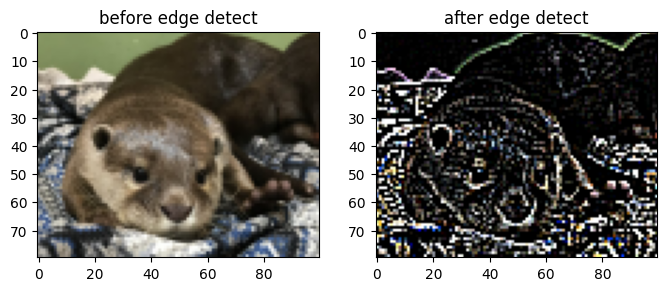

In [42]:
# 원본의 컬러를 유지 안 하려면, 컨볼루젼 썸이 0

edge_detect = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1] ])
kernel = edge_detect
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(8, 4))
plt.subplot(121),plt.imshow(image),plt.title('before edge detect')
plt.subplot(122),plt.imshow(dst),plt.title('after edge detect')
plt.show()

# differ-x filter

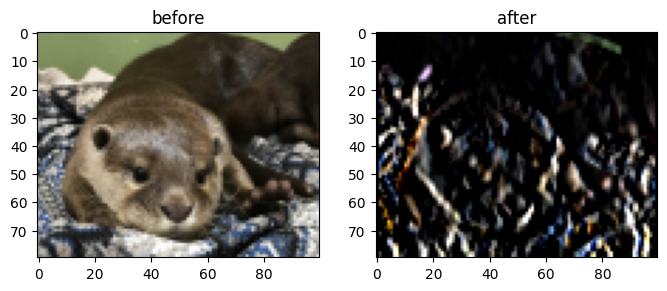

In [49]:
differ_xfilter = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1] ])

kernel = differ_xfilter
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(8, 4))
plt.subplot(121),plt.imshow(image),plt.title('before')
plt.subplot(122),plt.imshow(dst),plt.title('after')
plt.show()

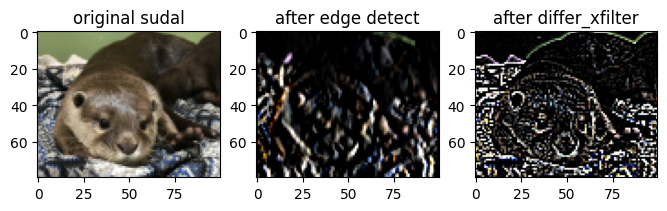

In [52]:
differ_xfilter = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1] ])
kernel1 = differ_xfilter
dst1 = cv2.filter2D(image, -1, kernel1)
plt.figure(figsize=(8, 4))
plt.subplot(131),plt.imshow(image),plt.title('original sudal')
plt.subplot(132),plt.imshow(dst1),plt.title('after edge detect')

edge_detect = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1] ])
kernel2 = edge_detect
dst2 = cv2.filter2D(image, -1, kernel2)
plt.subplot(133),plt.imshow(dst2),plt.title('after differ_xfilter')
plt.show()

# sharpen필터:이미지를 선명하게 만드는 데 사용되며, 엣지를 강조하여 이미지를 더 선명하게 보이게 합니다.

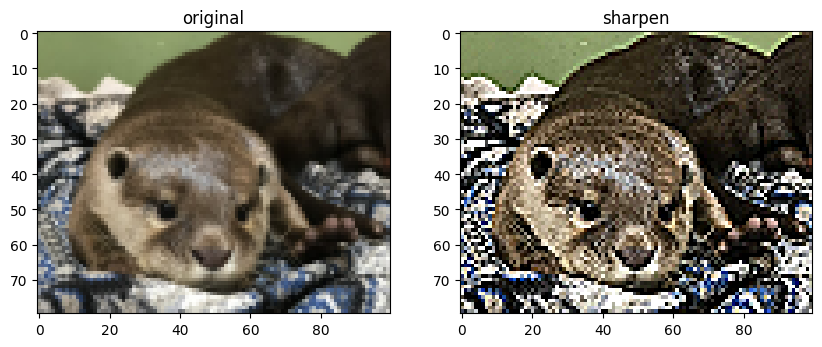

In [40]:
sharpen = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0] ])
# 컨볼루젼 썸이 1이라서 원본의 컬러를 유지

kernel = sharpen
dst = cv2.filter2D(image, -1, kernel)
plt.figure(figsize=(10, 4))
plt.subplot(121),plt.imshow(image),plt.title('original')
plt.subplot(122),plt.imshow(dst),plt.title('sharpen')
plt.show()